In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Загрузить данные в DataFrame из csv-файла
df = pd.read_csv('AB_NYC_2019.csv')
df.sample(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2127,976242,Cozy East Village Haven,854208,Anna,Manhattan,East Village,40.72820,-73.98893,Entire home/apt,200,10,35,2019-01-02,0.46,1,51
15662,12650991,"Homey, Peaceful, and Spacious Space",709939,Vanessa,Brooklyn,Bedford-Stuyvesant,40.69527,-73.94784,Private room,50,30,4,2017-04-19,0.11,1,0
2750,1487222,2BR Sunlight & Secret Garden Apartment,1308282,Sam,Brooklyn,Crown Heights,40.67838,-73.95549,Entire home/apt,145,4,18,2018-11-25,0.25,1,0


In [3]:
# Удалить колонки
df = df.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis='columns')
df.sample(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
14236,Brooklyn,Bedford-Stuyvesant,40.68366,-73.94607,Private room,75,2,129,3.36,3,227
14308,Brooklyn,Bedford-Stuyvesant,40.69155,-73.94975,Entire home/apt,165,4,123,3.08,1,43
36616,Manhattan,Hell's Kitchen,40.76129,-73.99430,Private room,250,1,4,0.44,1,365


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [5]:
df['longitude'].value_counts()

longitude
-73.95677    18
-73.95427    18
-73.95405    17
-73.95060    16
-73.94791    16
             ..
-73.85155     1
-73.83167     1
-73.85058     1
-73.79232     1
-73.80844     1
Name: count, Length: 14718, dtype: int64

In [6]:
# Проверить есть ли ячейки со значением NaN
df.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
# В колонке 'reviews_per_month' заменить NaN на среднее значение
df['reviews_per_month']
average = df['reviews_per_month'].mean()
df['reviews_per_month'] = df['reviews_per_month'].fillna(average)
df['reviews_per_month'].isna().sum()

0

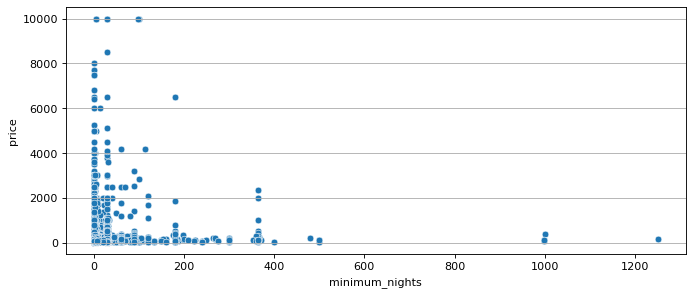

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=80)
# Строим график рассеяния (между двумя переменными)
sns.scatterplot(data=df, x='minimum_nights', y='price')
axes.grid(axis='y');

In [9]:
# Найти выбросы с большим значением по колонке 'minimum_nights' и низкой ценой
mask = (df['minimum_nights'] > 900) & (df['price'] < 1000)
outliers = df[mask]
# Удалить строки с выбросами из DataFrame'a
df = df.drop(outliers.index, axis='rows')

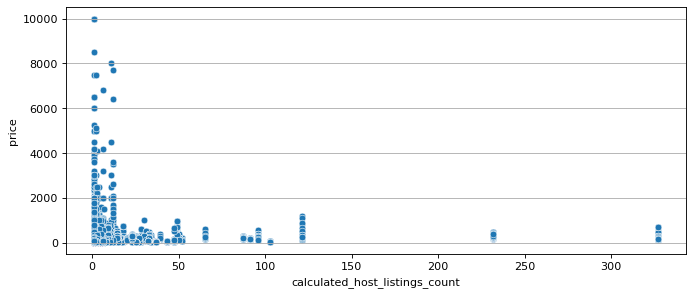

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=80)
# Строим график рассеяния (между двумя переменными)
sns.scatterplot(data=df, x='calculated_host_listings_count', y='price')
axes.grid(axis='y');

In [11]:
# Найти выбросы с большим значением по колонке 'calculated_host_listings_count' и низкой ценой
mask = (df['calculated_host_listings_count'] > 250) & (df['price'] < 1000)
outliers = df[mask]
# Удалить строки с выбросами из DataFrame'a
df = df.drop(outliers.index, axis='rows')

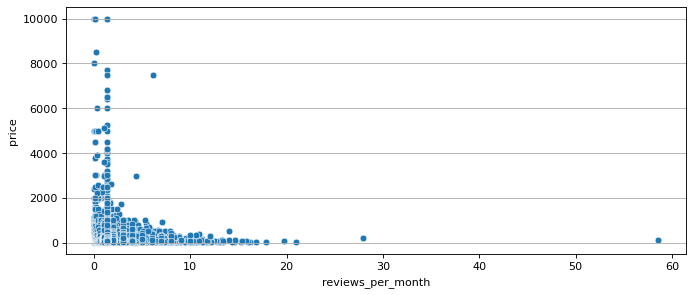

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=80)
# Строим график рассеяния (между двумя переменными)
sns.scatterplot(data=df, x='reviews_per_month', y='price')
axes.grid(axis='y');

In [13]:
# Найти выбросы с большим значением по колонке 'reviews_per_month' и низкой ценой
mask = (df['reviews_per_month'] > 55) & (df['price'] < 1000)
outliers = df[mask]
# Удалить строки с выбросами из DataFrame'a
df = df.drop(outliers.index, axis='rows')

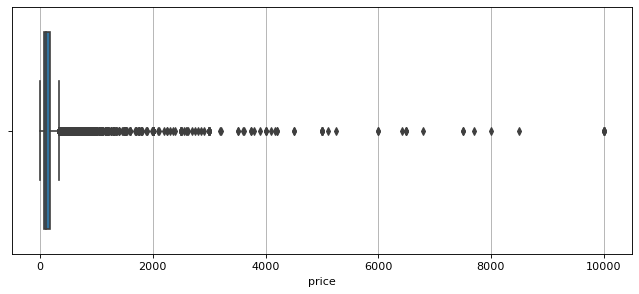

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=80)
sns.boxplot(data=df, x='price');
axes.grid(axis='x');

In [15]:
# Найти выбросы с высокой ценой и ценой близкой к 0
mask = (df['price'] < 10) | (df['price'] > 3000)
outliers = df[mask]
# Удалить строки с выбросами из DataFrame'a
df = df.drop(outliers.index, axis='rows')

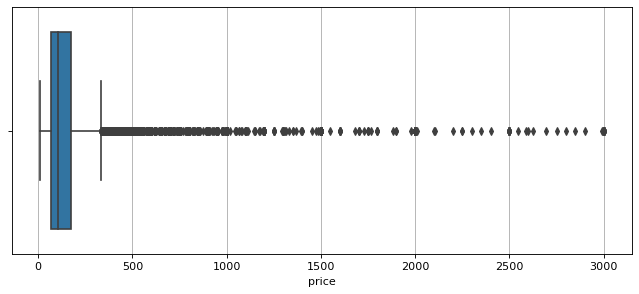

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=80)
sns.boxplot(data=df, x='price');
axes.grid(axis='x');

In [17]:
# Было 48895 строк. После удаления выбросов 48506 строк
# Чтобы не загромождать блокнок, вывод графиков после удаления выбросов - пропустил
df.shape

(48506, 11)

In [18]:
# Считаем метрики для колонок с числами
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48506.000000,48506.000000,48506.000000,48506.000000,48506.000000,48506.000000,48506.000000,48506.000000
mean,40.728991,-73.951822,146.904156,6.866037,23.421412,1.369984,4.992578,111.407578
std,0.054692,0.046130,157.480851,17.548990,44.685317,1.478940,20.004927,130.984983
min,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.689880,-73.982718,69.000000,1.000000,1.000000,0.270000,1.000000,0.000000
50%,40.723200,-73.955445,105.000000,3.000000,5.000000,1.200000,1.000000,43.000000
75%,40.763287,-73.935970,175.000000,5.000000,24.000000,1.580000,2.000000,221.000000
max,40.913060,-73.712990,3000.000000,500.000000,629.000000,27.950000,232.000000,365.000000


In [19]:
# Считаем попарную корреляцию месжду признаками
df.corr(numeric_only=True)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.083605,0.050479,0.026638,-0.015599,-0.008825,0.045087,-0.009550
longitude,0.083605,1.000000,-0.208659,-0.067905,0.056076,0.136961,-0.076784,0.095198
price,0.050479,-0.208659,1.000000,0.042272,-0.055925,-0.028483,0.079707,0.101974
minimum_nights,0.026638,-0.067905,0.042272,1.000000,-0.089747,-0.105842,0.210597,0.157811
number_of_reviews,-0.015599,0.056076,-0.055925,-0.089747,1.000000,0.537219,-0.072875,0.178200
reviews_per_month,-0.008825,0.136961,-0.028483,-0.105842,0.537219,1.000000,-0.036888,0.163817
calculated_host_listings_count,0.045087,-0.076784,0.079707,0.210597,-0.072875,-0.036888,1.000000,0.220285
availability_365,-0.009550,0.095198,0.101974,0.157811,0.178200,0.163817,0.220285,1.000000


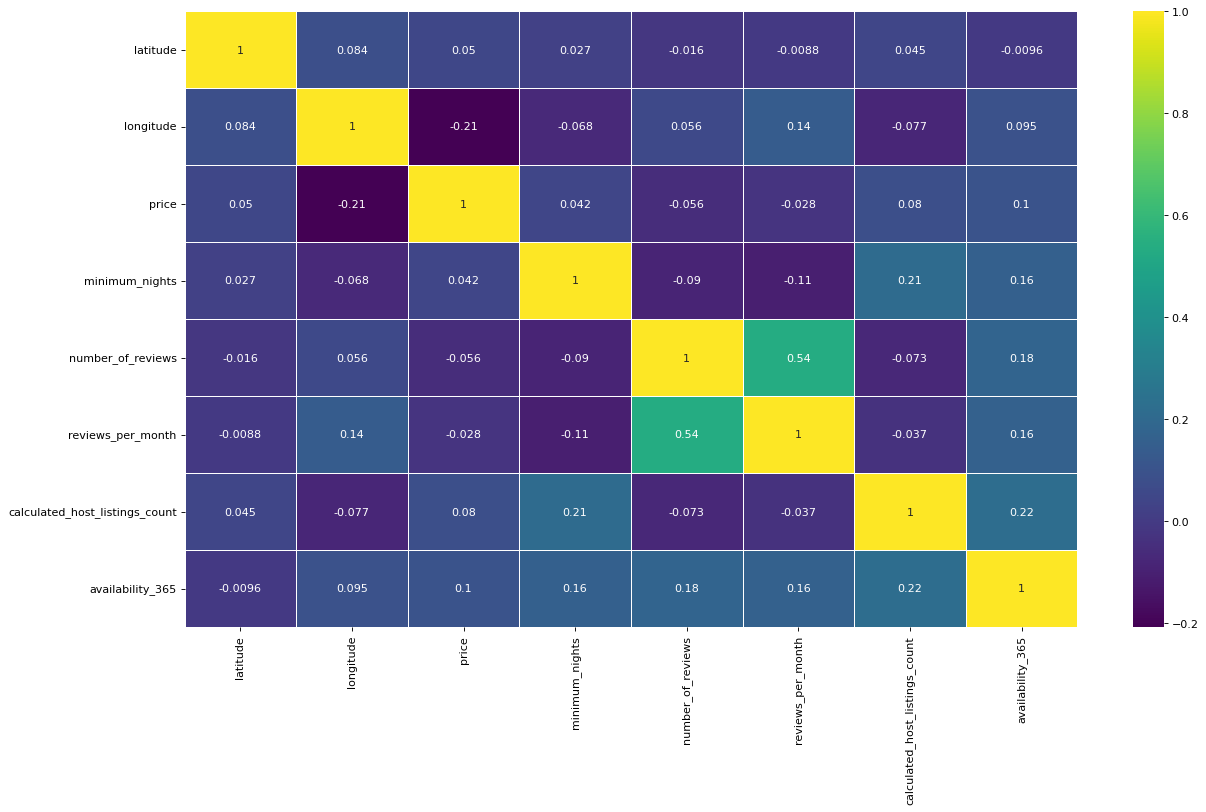

In [20]:
'''
sns.pairplot(
    data=df,
    hue='price',
    corner=True
);
'''

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 10), dpi=80)
# Строим график тепловой карты (корреляция между числовыми признаками)
sns.heatmap(
    #data=df,
    data=df.corr(numeric_only=True),
    annot=True,
    linewidths=0.5,
    cmap='viridis'
);
# Извините, это вместо графика pairplot (когда числовых признаков много он мне совсем не нравится)

In [21]:
neighbourhoodCount = df['neighbourhood'].value_counts()
neighbourhoodCount = neighbourhoodCount.to_dict()

def neighbourhoodToCount(value):
    res = -1
    for name in neighbourhoodCount.keys():
        if value == name:
            res = neighbourhoodCount.get(name)
            break
    return res

# Заменить категориальный признак на кол-во каждой категории
df['neighbourhood'] = df['neighbourhood'].apply(neighbourhoodToCount)
df['neighbourhood']

0         175
1        1540
2        2655
3         569
4        1116
         ... 
48890    3707
48891    2462
48892    2655
48893    1942
48894    1942
Name: neighbourhood, Length: 48506, dtype: int64

In [22]:
fileName = 'AB_NYC_2019_MY.csv'
# Записать данные DataFrame'a в csv-файл
# index=False: Не сохранять колонку с индексом. (по умолчанию True)
#df.to_csv(fileName, index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48506 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48506 non-null  object 
 1   neighbourhood                   48506 non-null  int64  
 2   latitude                        48506 non-null  float64
 3   longitude                       48506 non-null  float64
 4   room_type                       48506 non-null  object 
 5   price                           48506 non-null  int64  
 6   minimum_nights                  48506 non-null  int64  
 7   number_of_reviews               48506 non-null  int64  
 8   reviews_per_month               48506 non-null  float64
 9   calculated_host_listings_count  48506 non-null  int64  
 10  availability_365                48506 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.4+ MB
